In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, OPTICS, KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from functions import *
%matplotlib inline

# Import dei dati

In [26]:
# import dei centroidi
data = pd.read_csv("../data/processed/CLUSTERING_data_centres.csv")
data.drop(labels='Unnamed: 0',inplace=True,axis=1)
data.head()

,wn,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,184.0,-0.000220,-0.000193,-0.000177,0.000025,0.000879,0.000247,1.721492e-04,-0.000036,-0.000631,-0.000252,0.000280,-0.000465,-0.000709,-0.000518,-0.000307
1,185.0,-0.000161,-0.000156,-0.000216,0.000083,0.000948,0.000079,9.756678e-05,-0.000020,-0.000487,-0.000301,0.000239,-0.000215,-0.000794,-0.000407,-0.000337
2,186.0,-0.000150,-0.000161,-0.000233,0.000078,0.000975,0.000021,5.995975e-05,-0.000023,-0.000463,-0.000316,0.000209,-0.000161,-0.000827,-0.000405,-0.000359
3,187.0,-0.000139,-0.000180,-0.000247,0.000045,0.001033,-0.000062,2.595913e-07,-0.000029,-0.000463,-0.000301,0.000168,-0.000130,-0.000859,-0.000414,-0.000396
4,188.0,-0.000131,-0.000238,-0.000251,-0.000056,0.001148,-0.000187,-9.934144e-05,-0.000047,-0.000527,-0.000219,0.000106,-0.000173,-0.000882,-0.000453,-0.000461


In [7]:
pure_material_names,pure_materials = import_pure_spectra('../data/raw/Database Raman/BANK_LIST.dat','../data/raw/Database Raman/')

,Albite_wn,Albite_I,Almandine_wn,Almandine_I,Amesite_wn,Amesite_I,Anatase_wn,Anatase_I,Andradite_wn,Andradite_I,...,Talc_wn,Talc_I,Titanite_wn,Titanite_I,Tremolite_wn,Tremolite_I,Zircon_wn,Zircon_I,Zoisite_wn,Zoisite_I
0,100.0000,0.00000,100.0000,0.000000,100.0000,0.000000,100.0000,0.00000,100.0000,0.000000,...,100.0000,0.000000,100.0000,0.0000,100.0000,0.000000,100.0000,0.000000,100.0000,0.000000
1,130.3772,0.00000,127.8412,0.000000,108.7196,0.000000,119.7566,0.00000,122.4867,0.000000,...,153.7797,0.000000,150.2341,0.0000,141.9265,0.000000,155.9293,0.000000,163.1987,0.000000
2,130.8593,29.94379,128.3233,0.388184,109.2017,6.031250,120.2387,228.53710,122.9688,8.033752,...,154.2619,0.392578,150.7162,167.7500,142.4086,4.830078,156.4115,24.014160,163.6808,18.185550
3,131.3414,40.09552,128.8054,0.040894,109.6838,1.233398,120.7209,27.95508,123.4509,7.316895,...,154.7440,9.555908,151.1983,283.5840,142.8907,0.161621,156.8936,35.441410,164.1630,26.076170
4,131.8235,32.20599,129.2875,14.570310,110.1660,6.476074,121.2030,84.98828,123.9330,2.533508,...,155.2261,41.726320,151.6805,256.0781,143.3728,6.734375,157.3757,5.512695,164.6451,3.950195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#import dei pesi dei cluster
labels=np.loadtxt("../data/processed/CLUSTERING_weights.txt")

# Interpolazione

Ora devo interpolare gli spettri puri ai dati

In [9]:
pure_materials_interpoled=pd.DataFrame(data.wn.copy())
for temp in pure_material_names:
    pure_materials_interpoled=pure_materials_interpoled.join(pd.DataFrame(np.interp(data.wn, pure_materials[temp+'_wn'] ,pure_materials[temp+'_I']),columns=[temp]))


In [10]:
#Normalizzazione
for i in pure_material_names:
    pure_materials_interpoled[i]=pure_materials_interpoled[i]/np.trapz(abs(pure_materials_interpoled[i].dropna()), x=pure_materials_interpoled[i])

# Fit

In [11]:
ols = LinearRegression(positive=True) #definisco il regressore

In [12]:
N_cluster=len(data.columns)-1
coeff=[]
for i in range(N_cluster):
    ols.fit(pure_materials_interpoled[pure_material_names], data[str(i)])#ottimizziamo il modello (lineare) su i dati di training
    coeff.append(ols.coef_)

### Plot dei vari centroidi dei cluster e del rispettivo fit

In [31]:
N_cluster

15

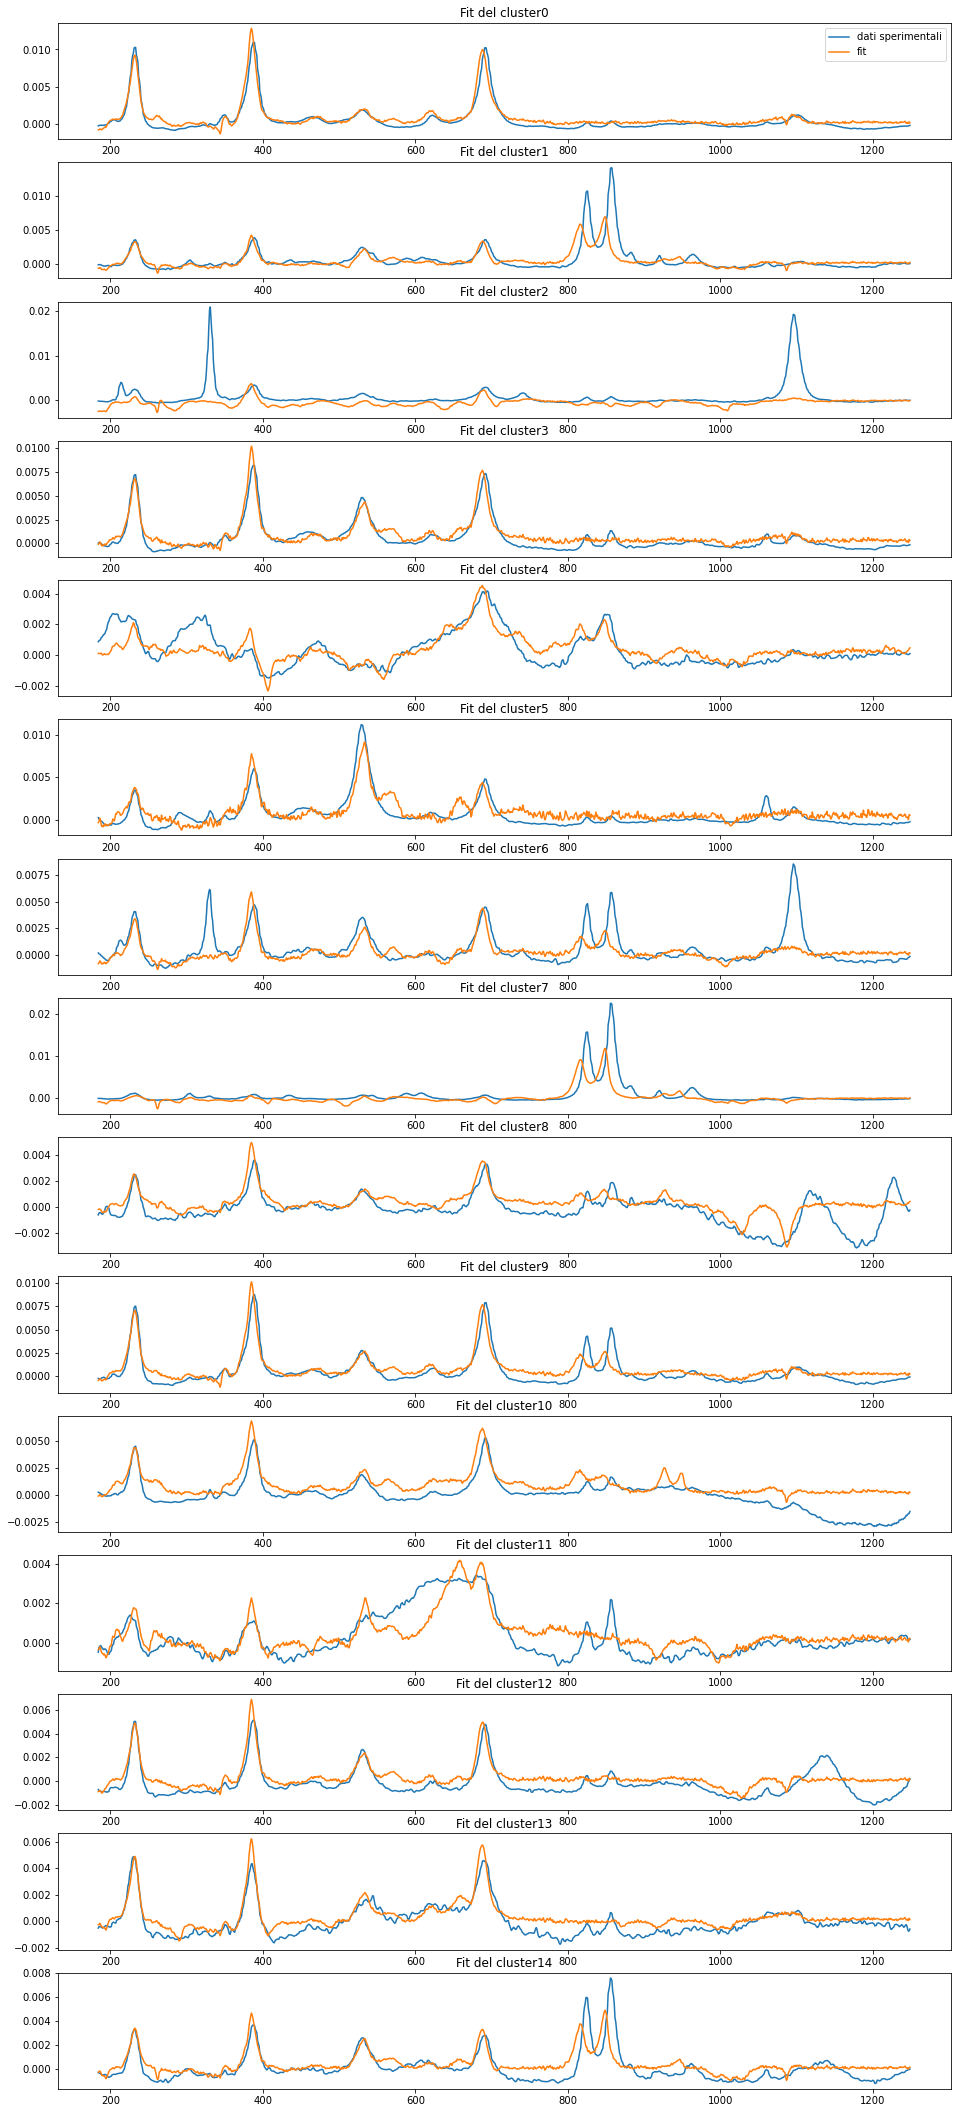

In [42]:
fig, axs = plt.subplots(nrows = N_cluster,figsize = (16,38))
for i in enumerate(range(N_cluster)):
    axs[i[0]].plot(data.wn,data[str(i[0])])
    axs[i[0]].plot(pure_materials_interpoled.wn,np.sum(pure_materials_interpoled[pure_material_names] * coeff[i[0]] ,axis=1))
    axs[i[0]].set_title('Fit del cluster' + str(i[0]))
    axs[0].legend(['dati sperimentali','fit'], loc='upper right')

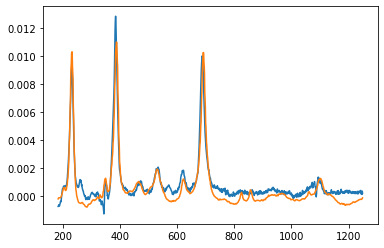

In [28]:
plt.plot(pure_materials_interpoled.wn,np.sum(pure_materials_interpoled[pure_material_names] * coeff[0] ,axis=1))
plt.plot(data.wn,data['0'])

In [25]:
labels

array([ 1.,  7.,  4.,  0.,  0.,  5.,  3.,  0., 14.,  7.,  3.,  5.,  0.,
        9.,  5., 13.,  0.,  1.,  9.,  0.,  0.,  6.,  0.,  3.,  0.,  5.,
       12.,  2., 13.,  0.,  9.,  4., 10.,  0., 10.,  7.,  0.,  9., 14.,
        9.,  0.,  0.,  5.,  0.,  2.,  1., 12., 10., 14.,  0.,  9.,  0.,
        9.,  9.,  3.,  3.,  3.,  3.,  0.,  3.,  3.,  0., 11.,  2.,  1.,
        1., 11.,  9.,  2.,  7.,  9.,  0.,  6.,  9.,  3.,  5.,  1.,  0.,
        2.,  0.,  3., 14.,  9.,  3.,  5.,  7., 13., 11.,  1.,  0.,  3.,
        3., 10.,  7.,  0., 12.,  9.,  1.,  9.,  0.,  3.,  0.,  0.,  0.,
        8.,  0.,  0.,  9.,  3., 13.,  3.,  6.,  5.,  0.,  7.,  0.,  8.,
       11., 10.,  4.,  1.])

Ora, tenendo conto dei pesi dei clustering, sommo i coeficienti pesandoli e poi li normalizzo, in modo da trovare le percentuali.

In [64]:
#numero di spettri per cluster in ordine
weights=[np.count_nonzero(labels==i) for i in range(len(data.columns)-1)] 
#moltiplico i coeficienti del cluster i-esimo per questo numero
abbundances_notnormalized=[coeff[i]*weights[i] for i in range(len(data.columns)-1)]
#e infine ho la media pesata dei coeficienti
abbundances=sum(abbundances_notnormalized)/(sum(abbundances_notnormalized).sum())
#Creo un Pandas dataframe con nomi e abbondanze
abbundance_table=pd.DataFrame({'names':pure_material_names,'abbundances':abbundances})
#riordino in base alla concenrazione
abbundance_table.sort_values('abbundances',ascending=False,inplace=True)
abbundance_table.head(5)

,names,abbundances
42,Montmorillonite,0.933737
0,Albite,0.032279
44,Nontronite,0.016749
46,Phlogopite,0.006659
29,Hedenbergite,0.001836
